# Visualización de Datos - Scikit-learn

La mayoría de los datos para trabajar en scikit-learn se encuentran almacenados en **arrays de 2 dimensiones** con la forma [n_samples, n_features]. 

- **n_samples**: número de muestras. Cada una de las filas enel dataset representa un elemento a procesar. Por ejemplo una imagen. un sonido o cualquier elemento que pueda ser descrito por diferentes características.
- **n_features**: número de características. Cada una de las columnas son valores cuantitativos que describen cada uno de los items. Por lo general son valores reales,aunque pueden ser categoricos o valores discretos.

**NOTA**: De manera particular, algunos algoritmas permiten trabajar con matrices dispersas (scipy.sparse). Por lo general, ese manejo con matrices dispersas se realiza cuando se cuenta con un gran número de características y los valores son cero en la gran mayoría de los casos. Este tipo de matrices manejan mucho mejor la memoria.

## Dataset IRIS

Este dataset contiene información sobre tres especies de flores Iris diferentes (Iris Setosa, Iris Versicolor e Iris Virginica). 

El dataset Iris que provee scikit-learn viene definido por:
- **Features**: 
    - Longitud del sépalo [cm]
    - Ancho del sépalo [cm]
    - Longitud del pétalo [cm]
    - Ancho del pétalo [cm]
- **Labels**:
    - Iris Setosa
    - Iris Vertiginosa
    - Iris Virginica

**NOTA**: [Repositorio UCI](http://archive.ics.uci.edu/ml/index.php): Contiene muchos datasets para realizar diferentes tipos de experimentos. Algunos de estos estan incluidos en scikit-learn evitando tener que realizar un preprocesado de los datos que por lo general vienen en formato texto o CSV.

**Lectura del dataset Iris**

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Una vez cargado el dataset en Python, este se presenta como un tipo *Bunch* y para ver el contenido del mismo se usa el método *keys()*:

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Las muestras del dataset se encuentran en el atributo *data*. A continuación se verá como obtener la información más relevante:

In [4]:
n_samples, n_features = iris.data.shape
print("Número de ejemplos: ", n_samples)
print("Número de características: ", n_features)

Número de ejemplos:  150
Número de características:  4


Para ver la información contenida en alguna de las muestras, por ejemplo la primera de ellas se ejecuta:

In [5]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


La información de las etiquetas de cada una de las muestras se encuentra en el atributo *target*. Estos valores son númericos y cada uno de ellos representan a una de las clases.

- 0: Iris Setosa
- 1: Iris Versicolor
- 2: Iris Virginica

Otra particularidad del dataset es que las clases se distribuyen uniformemente (50 flores de cada espece).

In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

**NOTA**: La función ***bincount()*** cuenta el número de ocurrencias de cada valor en un array.

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Los datos en este dataset tienen cuatro dimensiones(características) pero pueden visualizarse graficando una o dos dimensiones usando histogramas o un grafico tipo scatter.

**Histograma - Ancho del Pétalo**

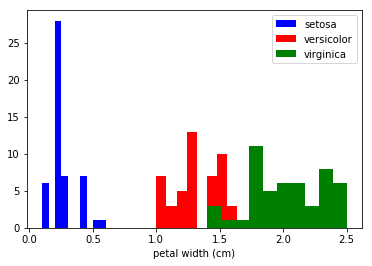

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Característica 3 - Ancho del Pétalo [cm]
x_index =  3

# Se asigna un color a cada una de las clases
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target)), colors):
    plt.hist(iris.data[iris.target==label, x_index], label=iris.target_names[label], color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

**Scatter - Ancho del Pétalo Vs - Longitud del Cépalo**

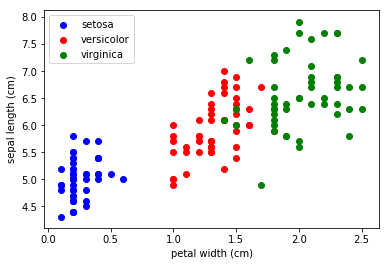

In [9]:
# Ancho del Pétalo
x_index = 3
# Longitud del Cépalo
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index], 
                label=iris.target_names[label], 
                c=color)
    
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### Matrices scatterplot

Estas permiten visualizar y analizar las características del dataset en scatter plots e histogramas de forma más eficiente.

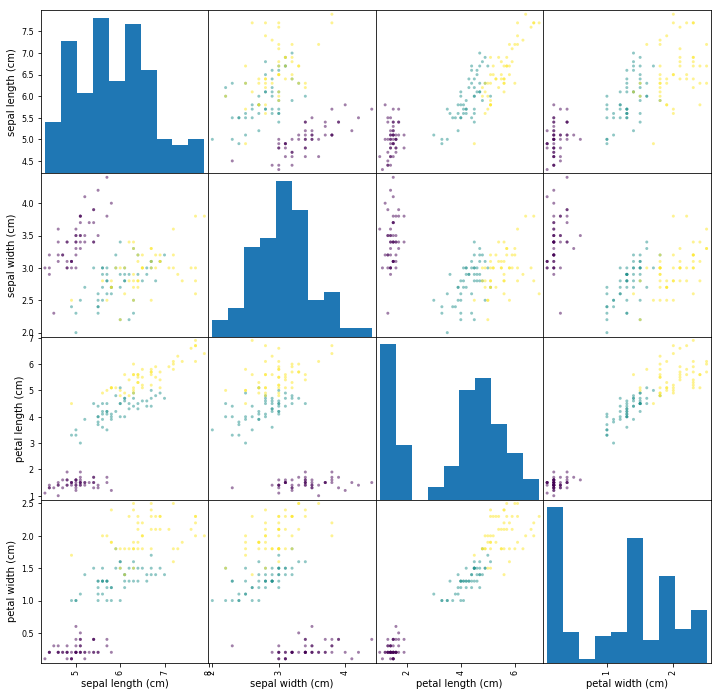

In [39]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=iris.target, figsize=(12, 12));